# Laptop Price Prediction 

#### About the Dataset

- 1 Company- String -Laptop Manufacturer 
- 2 Product -String -Brand and Model 
- 3 TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.) 
- 4 Inches -Numeric- Screen Size 
- 5 ScreenResolution -String- Screen Resolution 
- 6 Cpu- String -Central Processing Unit (CPU) 
- 7 Ram -String- Laptop RAM 
- 8 Memory -String- Hard Disk / SSD Memory 
- 9 GPU -String- Graphics Processing Units (GPU) 
- 10 OpSys -String- Operating System 
- 11 Weight -String- Laptop Weight 
- 12 Price_euros -Numeric- Price (Euro)

In [867]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [868]:
df = pd.read_csv("laptop_price.csv", encoding="latin-1")

In [869]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [870]:
df.shape

(1303, 13)

In [871]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [872]:
df.duplicated().sum()

0

In [873]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [874]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [875]:
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [876]:
df.select_dtypes(include="object").columns

Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

#### Data Cleaning

- Ram 

In [877]:
df["Ram"].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [878]:
df["Ram"]=df["Ram"].str.replace("GB","")

In [879]:
df["Ram"].head()

0     8
1     8
2     8
3    16
4     8
Name: Ram, dtype: object

In [880]:
df["Ram"]= pd.to_numeric(df["Ram"])

In [881]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 132.5+ KB


- Weight

In [882]:
df["Weight"]=df["Weight"].str.replace("kg","")

In [883]:
df["Weight"].head()

0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight, dtype: object

In [884]:
df["Weight"]= pd.to_numeric(df["Weight"])

In [885]:
df["Weight"].head()

0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight, dtype: float64

## EDA

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_57126/1815304593.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price_euros"])


<Axes: xlabel='Price_euros', ylabel='Density'>

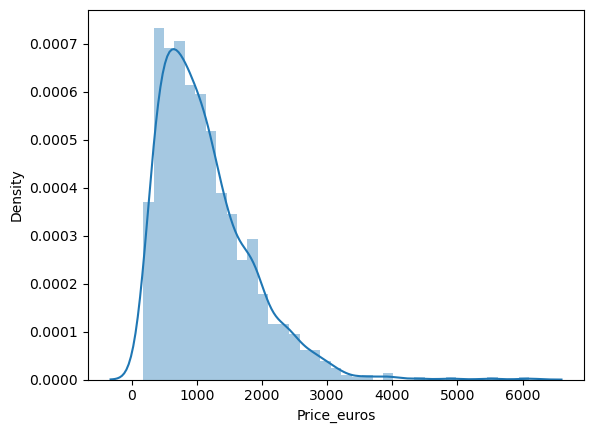

In [886]:
sns.distplot(df["Price_euros"])

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_57126/3769976970.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df["Price_euros"]))


<Axes: xlabel='Price_euros', ylabel='Density'>

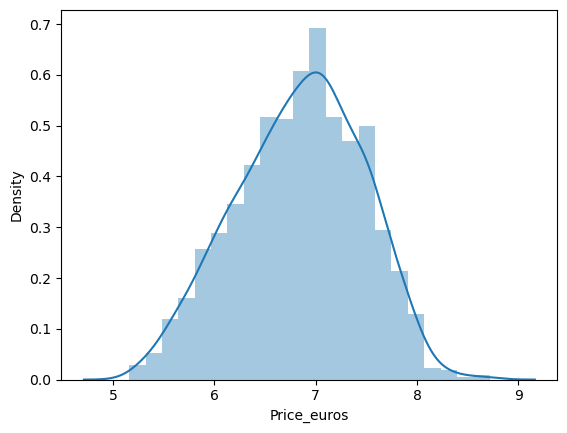

In [887]:
sns.distplot(np.log(df["Price_euros"]))

In [888]:
df["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [889]:
df["Company"].nunique()

19

<Axes: xlabel='Company', ylabel='Count'>

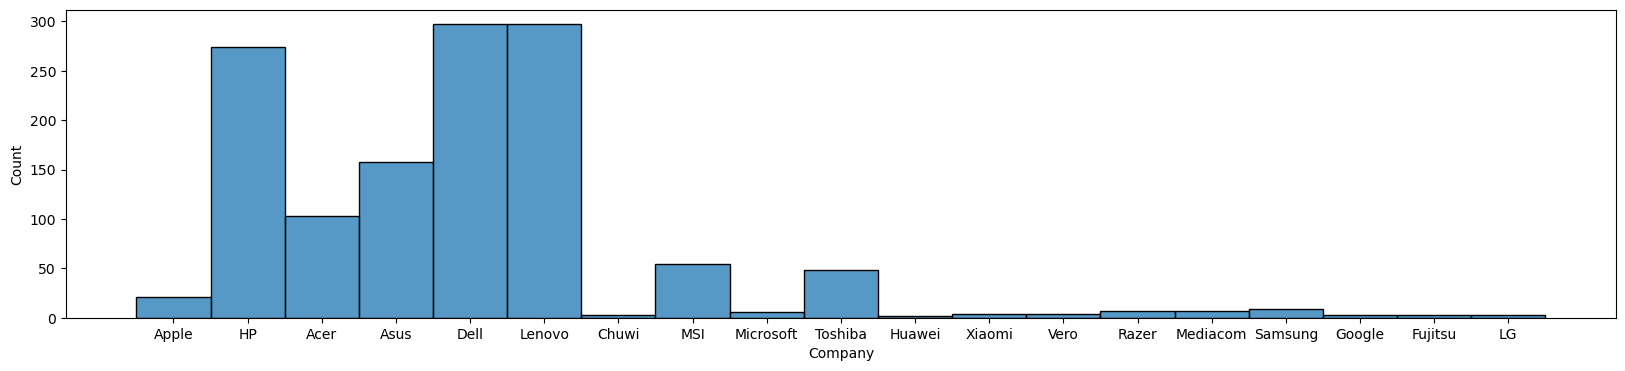

In [890]:
plt.figure(figsize=(20,4))
sns.histplot(df["Company"])

<Axes: xlabel='Company', ylabel='Price_euros'>

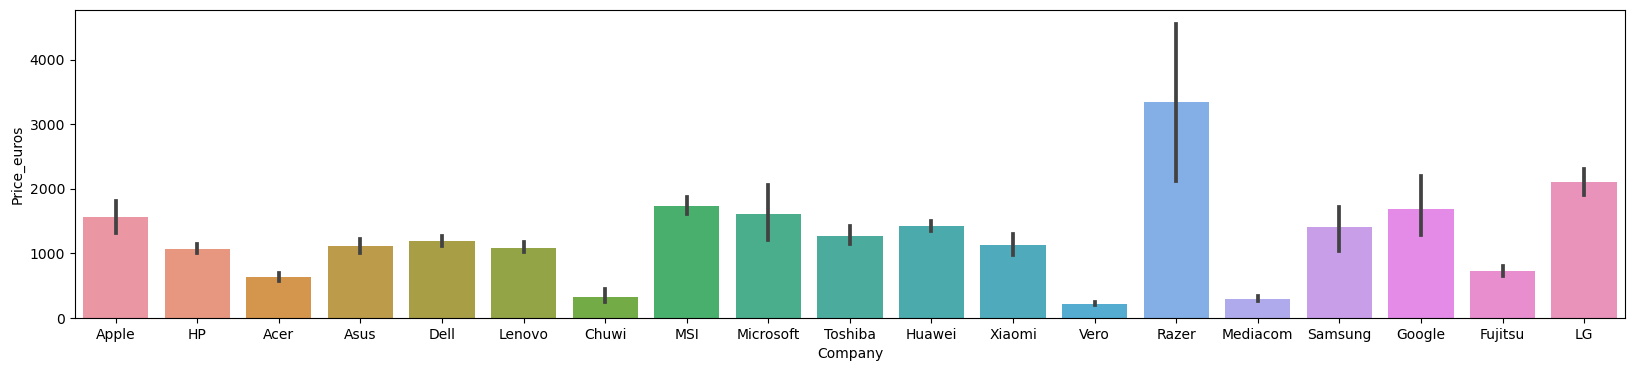

In [891]:
plt.figure(figsize=(20,4))
sns.barplot(df,x=df["Company"],y=df["Price_euros"])

In [892]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [893]:
df["TypeName"].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

<Axes: xlabel='TypeName', ylabel='Price_euros'>

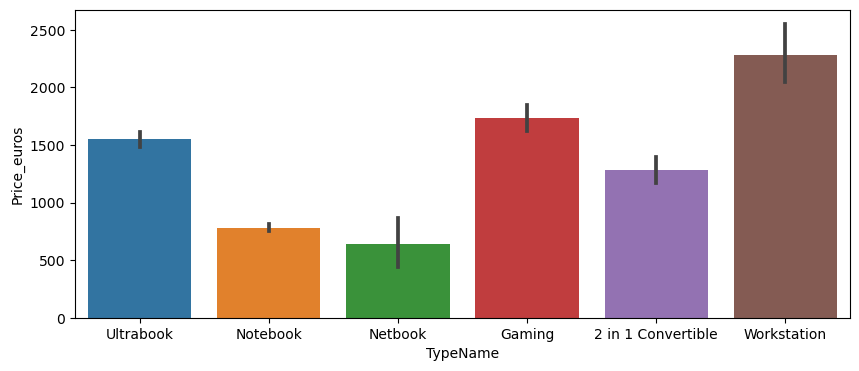

In [894]:
plt.figure(figsize=(10,4))
sns.barplot(df,x=df["TypeName"],y=df["Price_euros"])

<Axes: xlabel='Inches', ylabel='Price_euros'>

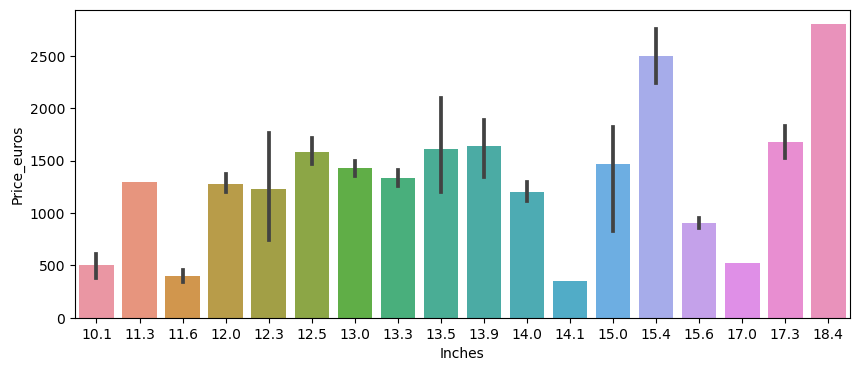

In [895]:
plt.figure(figsize=(10,4))
sns.barplot(df,x=df["Inches"],y=df["Price_euros"])

In [896]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [897]:
df["ScreenResolution"].nunique()

40

In [898]:
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [899]:
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)

In [900]:
df["Touchscreen"].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

<Axes: xlabel='Touchscreen', ylabel='Price_euros'>

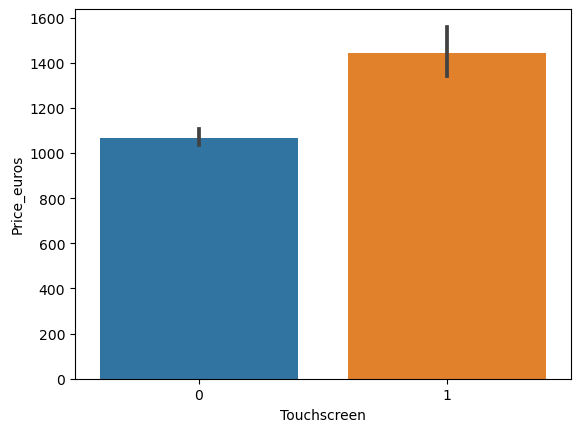

In [901]:
sns.barplot(x=df["Touchscreen"],y=df["Price_euros"])

In [902]:
df["IPS Panel"] = df["ScreenResolution"].apply(lambda x: 1 if "IPS Panel" in x else 0)

In [903]:
df["IPS Panel"].value_counts()

0    938
1    365
Name: IPS Panel, dtype: int64

<Axes: xlabel='IPS Panel', ylabel='Price_euros'>

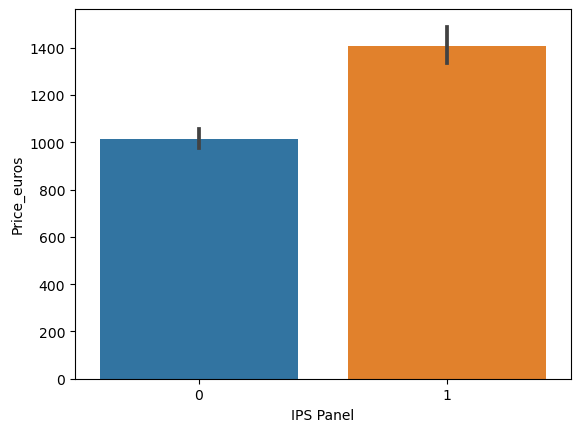

In [904]:
sns.barplot(x=df["IPS Panel"],y=df["Price_euros"])

In [905]:
df["ScreenResolution"].head()

0    IPS Panel Retina Display 2560x1600
1                              1440x900
2                     Full HD 1920x1080
3    IPS Panel Retina Display 2880x1800
4    IPS Panel Retina Display 2560x1600
Name: ScreenResolution, dtype: object

In [906]:
df["ScreenResolution"].str.split("x")

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object

In [907]:
df["X_res"] = df["ScreenResolution"].apply(lambda x: x.split("x")[0][-4:])

In [908]:
df["Y_res"] = df["ScreenResolution"].apply(lambda x: x.split("x")[1][-4:])

In [909]:
df["X_res"]

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1303, dtype: object

In [910]:
df["Y_res"]

0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1298    1080
1299    1800
1300     768
1301     768
1302     768
Name: Y_res, Length: 1303, dtype: object

In [911]:
df["X_res"]=df["X_res"].str.replace(" ","")

In [912]:
df["X_res"] = pd.to_numeric(df["X_res"])

In [913]:
df["Y_res"]=df["Y_res"].str.replace(" ","")

In [914]:
df["Y_res"] = pd.to_numeric(df["Y_res"])

In [915]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS Panel,X_res,Y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [916]:
df.sample(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS Panel,X_res,Y_res
493,500,Acer,Aspire 5,Notebook,15.6,1366x768,AMD A10-Series 9620P 2.5GHz,8,1TB HDD,AMD Radeon RX 540,Windows 10,2.20,579.00,0,0,1366,768
1266,1284,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,549.99,0,0,1920,1080
826,835,Asus,ZenBook Flip,2 in 1 Convertible,13.3,Touchscreen / Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.10,1358.00,1,0,1920,1080
596,603,Lenovo,ThinkPad Yoga,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.37,2025.00,1,1,1920,1080
771,780,Samsung,Notebook 9,2 in 1 Convertible,15.0,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,AMD Radeon 540,Windows 10,1.71,1799.00,1,0,1920,1080
1166,1184,Lenovo,ThinkPad T570,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,1390.00,0,1,1920,1080
13,14,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,AMD Radeon R5 M430,Windows 10,2.20,498.90,0,0,1920,1080
1227,1245,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.18,521.86,0,0,1366,768
159,163,Toshiba,Satellite Pro,Notebook,15.6,1366x768,Intel Core i3 6006U 2.2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,447.00,0,0,1366,768
706,714,Acer,Spin 5,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,999.00,1,1,1920,1080


In [917]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
 13  Touchscreen       1303 non-null   int64  
 14  IPS Panel         1303 non-null   int64  
 15  X_res             1303 non-null   int64  
 16  Y_res             1303 non-null   int64  


In [918]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [919]:
df["Cpu"].str.split(" ")

0                         [Intel, Core, i5, 2.3GHz]
1                         [Intel, Core, i5, 1.8GHz]
2                  [Intel, Core, i5, 7200U, 2.5GHz]
3                         [Intel, Core, i7, 2.7GHz]
4                         [Intel, Core, i5, 3.1GHz]
                           ...                     
1298               [Intel, Core, i7, 6500U, 2.5GHz]
1299               [Intel, Core, i7, 6500U, 2.5GHz]
1300    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
1301               [Intel, Core, i7, 6500U, 2.5GHz]
1302    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
Name: Cpu, Length: 1303, dtype: object

In [920]:
df["Cpu_core"]= df["Cpu"].apply(lambda x:x.split(" ")[0:3])

In [921]:
df.sample(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS Panel,X_res,Y_res,Cpu_core
702,710,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,1366x768,AMD A12-Series 9720P 3.6GHz,8,1TB HDD,AMD Radeon R7,Windows 10,2.20,429.00,0,0,1366,768,"[AMD, A12-Series, 9720P]"
575,582,Mediacom,SmartBook 141,Notebook,14.0,Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,4,32GB SSD,Intel HD Graphics,Windows 10,1.40,249.00,0,0,1920,1080,"[Intel, Atom, x5-Z8350]"
11,12,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,1.86,344.99,0,0,1920,1080,"[Intel, Core, i3]"
281,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25,428.00,0,0,1920,1080,"[Intel, Core, i3]"
1019,1033,HP,EliteBook 1040,Notebook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.43,2229.00,0,0,1920,1080,"[Intel, Core, i7]"


In [922]:
df["Cpu_core"] = df["Cpu_core"].apply(lambda x: " ".join(x))

In [923]:
df.sample(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS Panel,X_res,Y_res,Cpu_core
106,109,Lenovo,Ideapad 310-15ISK,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,1.85,414.9,0,0,1920,1080,Intel Core i3
101,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,Windows 10,2.10,349.0,0,0,1920,1080,AMD E-Series E2-9000e
767,776,Dell,Inspiron 7559,Gaming,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72,1099.0,1,1,3840,2160,Intel Core i7
577,584,Lenovo,IdeaPad Y910-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.60,2663.0,0,1,1920,1080,Intel Core i7
29,30,HP,ProBook 470,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.50,896.0,0,0,1920,1080,Intel Core i5


In [924]:
df["Cpu_core"].nunique()

40

In [925]:
df["Cpu_core"].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [926]:
def processor(core):
    if core == "Intel Core i7" or core == "Intel Core i5" or core == "Intel Core i3" or core == "Intel Celeron Dual" or core == "Intel Pentium Quad" or core == "Intel Core M" or core == "AMD A9-Series 9420" or core == "Intel Celeron Quad" or core == "MD A6-Series 9220" or core == "AMD A12-Series 9720P":
        return core 
    else:
        return "Others"

In [927]:
df["Cpu_core"]=df["Cpu_core"].apply(processor)

In [928]:
df["Cpu_core"].sample(10)

1214         Intel Core i7
124     AMD A9-Series 9420
610                 Others
282          Intel Core i5
899          Intel Core i5
495          Intel Core i5
155          Intel Core i5
1147         Intel Core i7
618          Intel Core i7
813          Intel Core i7
Name: Cpu_core, dtype: object

In [929]:
df["Cpu_core"].value_counts()

Intel Core i7           527
Intel Core i5           423
Intel Core i3           136
Intel Celeron Dual       80
Others                   64
Intel Pentium Quad       27
Intel Core M             19
AMD A9-Series 9420       12
Intel Celeron Quad        8
AMD A12-Series 9720P      7
Name: Cpu_core, dtype: int64

In [930]:
df.sample(4)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS Panel,X_res,Y_res,Cpu_core
911,924,HP,Elitebook Folio,Ultrabook,12.5,4K Ultra HD / Touchscreen 3840x2160,Intel Core M 6Y75 1.2GHz,8,240GB SSD,Intel HD Graphics 515,Windows 10,1.09,3100.0,1,0,3840,2160,Intel Core M
384,390,Asus,Zenbook Flip,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.10,1748.9,1,0,1920,1080,Intel Core i7
918,932,Dell,Inspiron 7567,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.60,1349.0,0,0,1920,1080,Intel Core i7
510,517,Dell,XPS 13,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.29,899.0,1,1,1920,1080,Intel Core i5


In [931]:
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS Panel,X_res,Y_res,Cpu_core
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,Intel Core i5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,Intel Core i5


In [932]:
df["Product"].value_counts()

XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: Product, Length: 618, dtype: int64

In [933]:
df.drop(columns=["Product","ScreenResolution"],inplace=True)

In [934]:
df.head(5)

,laptop_ID,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS Panel,X_res,Y_res,Cpu_core
0,1,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5
1,2,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,Intel Core i5
2,3,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5
3,4,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,Intel Core i7
4,5,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,Intel Core i5


In [935]:
df["Cpu_Hz"]=df["Cpu"].apply(lambda x: x.split(" ")[-1:])

In [936]:
df["Cpu_Hz"].head(5)

0    [2.3GHz]
1    [1.8GHz]
2    [2.5GHz]
3    [2.7GHz]
4    [3.1GHz]
Name: Cpu_Hz, dtype: object

In [937]:
df["Cpu_Hz"] = df["Cpu_Hz"].apply(lambda x: " ".join(x))

In [938]:
df["Cpu_Hz"].head(5)

0    2.3GHz
1    1.8GHz
2    2.5GHz
3    2.7GHz
4    3.1GHz
Name: Cpu_Hz, dtype: object

In [939]:
df["Cpu_Hz"]=df["Cpu_Hz"].apply(lambda x: float(x.replace("GHz",""))) 

In [940]:
df["Cpu_Hz"].head(5)

0    2.3
1    1.8
2    2.5
3    2.7
4    3.1
Name: Cpu_Hz, dtype: float64

In [941]:
df.sample(5)

,laptop_ID,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS Panel,X_res,Y_res,Cpu_core,Cpu_Hz
628,635,Asus,2 in 1 Convertible,13.3,Intel Core i5 7200U 2.5GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,1.50,639.01,1,0,1920,1080,Intel Core i5,2.5
1081,1096,Lenovo,Gaming,17.3,Intel Core i7 6820HK 2.7GHz,32,512GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.60,3240.00,0,1,1920,1080,Intel Core i7,2.7
714,722,Dell,Notebook,15.6,Intel Core i5 7300U 2.6GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.93,1426.66,0,0,1920,1080,Intel Core i5,2.6
997,1011,Acer,Notebook,15.6,Intel Pentium Quad Core N4200 1.1GHz,4,500GB HDD,Intel HD Graphics 505,Windows 10,2.40,380.00,0,0,1366,768,Intel Pentium Quad,1.1
767,776,Dell,Gaming,15.6,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72,1099.00,1,1,3840,2160,Intel Core i7,2.6


In [942]:
df.drop(columns=["Cpu"],inplace=True)

In [943]:
df.sample(5)

,laptop_ID,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS Panel,X_res,Y_res,Cpu_core,Cpu_Hz
300,305,Asus,Notebook,14.0,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.3,509.0,0,0,1366,768,Intel Core i3,2.4
51,52,Acer,Notebook,15.6,8,256GB SSD,Nvidia GeForce MX150,Windows 10,2.2,841.0,0,1,1920,1080,Intel Core i7,1.8
1214,1232,Asus,Gaming,17.3,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.9,1949.0,0,0,1920,1080,Intel Core i7,2.8
609,616,Acer,Notebook,14.0,4,128GB Flash Storage,Intel HD Graphics 405,Windows 10,1.6,349.0,0,0,1366,768,Intel Pentium Quad,1.6
585,592,MSI,Gaming,17.3,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.5,2349.0,0,0,1920,1080,Intel Core i7,2.7


In [944]:
df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [945]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_57126/4023190604.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_57126/4023190604.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [946]:
df['Memory'] = df['Memory'].str.replace('\.0', '', regex=True)

In [947]:
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [948]:
temp = df["Memory"].str.split("+", n = 1, expand = True)

In [949]:
temp.sample(5)

,0,1
1182,256 SSD,None
1085,500 HDD,None
891,256 SSD,None
933,1000 SSD,None
1211,128 SSD,1000 HDD


In [950]:
df["one"] = temp[0]

In [951]:
df["two"] = temp[1]

In [952]:
df["one"].sample(5)

167             128 SSD 
588             1000 HDD
491              512 SSD
930             1000 HDD
1049    16 Flash Storage
Name: one, dtype: object

In [953]:
df["SSD_one"] = df["one"].apply(lambda x: 1 if "SSD" in x else 0)
df["HDD_one"] = df["one"].apply(lambda x: 1 if "HDD" in x else 0)
df["Flash Storage_one"] = df["one"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df["Hybrid_one"] = df["one"].apply(lambda x: 1 if "Hybrid" in x else 0)

In [954]:
df["one"]=df['one'].str.replace(r'\D', '')

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_57126/1897755309.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["one"]=df['one'].str.replace(r'\D', '')


In [955]:
df.sample(10)

,laptop_ID,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,HDD,SSD,Hybrid,Flash_Storage,one,two,SSD_one,HDD_one,Flash Storage_one,Hybrid_one
86,88,HP,Ultrabook,15.6,8,256 SSD,Nvidia GeForce GTX 940MX,Windows 10,1.83,699.00,...,0,256,0,0,256,None,1,0,0,0
229,234,HP,Notebook,15.6,8,1000 HDD,AMD FirePro W4190M,Windows 10,1.90,1269.00,...,1000,0,0,0,1000,None,0,1,0,0
4,5,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,...,0,256,0,0,256,None,1,0,0,0
1106,1121,MSI,Gaming,17.3,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.90,1511.19,...,1000,128,0,0,128,1000 HDD,1,0,0,0
442,449,Lenovo,Ultrabook,12.5,8,256 SSD,Intel HD Graphics 620,Windows 10,1.36,1429.00,...,0,256,0,0,256,None,1,0,0,0
534,541,Asus,Gaming,15.6,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.30,1649.00,...,1000,128,0,0,128,1000 HDD,1,0,0,0
1215,1233,Acer,Netbook,11.6,2,32 SSD,Intel HD Graphics,Chrome OS,1.30,174.00,...,0,32,0,0,32,None,1,0,0,0
388,394,Dell,Workstation,15.6,8,256 SSD,Nvidia Quadro M1200,Windows 10,2.00,2135.00,...,0,256,0,0,256,None,1,0,0,0
974,988,Asus,Gaming,17.3,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.73,2049.90,...,1000,256,0,0,256,1000 HDD,1,0,0,0
924,938,Lenovo,2 in 1 Convertible,13.3,8,512 SSD,Intel HD Graphics 620,Windows 10,1.37,1825.00,...,0,512,0,0,512,None,1,0,0,0


In [956]:
df["two"].fillna("0",inplace=True)

In [957]:
df["SSD_two"] = df["two"].apply(lambda x: 1 if "SSD" in x else 0)
df["HDD_two"] = df["two"].apply(lambda x: 1 if "HDD" in x else 0)
df["Flash Storage_two"] = df["two"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df["Hybrid_two"] = df["two"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["two"]=df['two'].str.replace(r'\D', '')

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_57126/3458684459.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df["two"]=df['two'].str.replace(r'\D', '')


In [958]:
df.sample(5)

,laptop_ID,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,one,two,SSD_one,HDD_one,Flash Storage_one,Hybrid_one,SSD_two,HDD_two,Flash Storage_two,Hybrid_two
72,74,Dell,Notebook,15.6,8,256 SSD,AMD Radeon 530,Windows 10,2.20,870.00,...,256,0,1,0,0,0,0,0,0,0
386,392,Lenovo,Notebook,13.3,4,128 SSD,Intel HD Graphics 620,Windows 10,1.50,549.00,...,128,0,1,0,0,0,0,0,0,0
261,266,Lenovo,Notebook,15.6,4,256 SSD,Intel HD Graphics 520,No OS,2.20,444.00,...,256,0,1,0,0,0,0,0,0,0
770,779,Dell,Notebook,15.6,16,256 SSD,AMD Radeon R7 M445,Windows 10,2.30,1181.27,...,256,0,1,0,0,0,0,0,0,0
1191,1209,Samsung,2 in 1 Convertible,12.3,4,32 Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15,659.00,...,32,0,0,0,1,0,0,0,0,0


In [959]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   laptop_ID          1303 non-null   int64  
 1   Company            1303 non-null   object 
 2   TypeName           1303 non-null   object 
 3   Inches             1303 non-null   float64
 4   Ram                1303 non-null   int64  
 5   Memory             1303 non-null   object 
 6   Gpu                1303 non-null   object 
 7   OpSys              1303 non-null   object 
 8   Weight             1303 non-null   float64
 9   Price_euros        1303 non-null   float64
 10  Touchscreen        1303 non-null   int64  
 11  IPS Panel          1303 non-null   int64  
 12  X_res              1303 non-null   int64  
 13  Y_res              1303 non-null   int64  
 14  Cpu_core           1303 non-null   object 
 15  Cpu_Hz             1303 non-null   float64
 16  HDD                1303 

In [960]:
df["one"]=pd.to_numeric(df["one"])

In [961]:
df["two"]=pd.to_numeric(df["two"])

In [962]:
df["SSD Size"] = df["one"]*df["SSD_one"]+df["two"]*df["SSD_two"]

In [963]:
df["HDD Size"] = df["one"]*df["HDD_one"]+df["two"]*df["HDD_two"]
df["Flash Storage Size"] = df["one"]*df["Flash Storage_one"]+df["two"]*df["Flash Storage_two"]
df["Hyrbid Size"] = df["one"]*df["Hybrid_one"]+df["two"]*df["Hybrid_two"]

In [964]:
df.sample(5)

,laptop_ID,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Flash Storage_one,Hybrid_one,SSD_two,HDD_two,Flash Storage_two,Hybrid_two,SSD Size,HDD Size,Flash Storage Size,Hyrbid Size
164,168,Acer,Notebook,15.6,4,1000 HDD,Intel HD Graphics 500,Windows 10,2.10,348.0,...,0,0,0,0,0,0,0,1000,0,0
101,104,HP,Notebook,15.6,4,500 HDD,AMD Radeon R2,Windows 10,2.10,349.0,...,0,0,0,0,0,0,0,500,0,0
100,103,HP,Notebook,15.6,8,256 SSD,AMD Radeon 530,Windows 10,1.91,719.0,...,0,0,0,0,0,0,256,0,0,0
1014,1028,HP,Notebook,13.3,4,500 HDD,Intel HD Graphics 620,Windows 10,1.49,800.0,...,0,0,0,0,0,0,0,500,0,0
983,997,Fujitsu,Notebook,15.6,4,256 SSD,Intel HD Graphics 520,Windows 10,2.30,649.0,...,0,0,0,0,0,0,256,0,0,0


In [965]:
df.columns

Index(['laptop_ID', 'Company', 'TypeName', 'Inches', 'Ram', 'Memory', 'Gpu',
       'OpSys', 'Weight', 'Price_euros', 'Touchscreen', 'IPS Panel', 'X_res',
       'Y_res', 'Cpu_core', 'Cpu_Hz', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage',
       'one', 'two', 'SSD_one', 'HDD_one', 'Flash Storage_one', 'Hybrid_one',
       'SSD_two', 'HDD_two', 'Flash Storage_two', 'Hybrid_two', 'SSD Size',
       'HDD Size', 'Flash Storage Size', 'Hyrbid Size'],
      dtype='object')

In [966]:
df.drop(columns=['two', 'one', 'SSD_one', 'HDD_one',
       'Flash Storage_one', 'Hybrid_one', 'SSD_two', 'HDD_two',
       'Flash Storage_two', 'Hybrid_two'],inplace = True)

In [967]:
df.sample(5)

,laptop_ID,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Cpu_core,Cpu_Hz,HDD,SSD,Hybrid,Flash_Storage,SSD Size,HDD Size,Flash Storage Size,Hyrbid Size
1217,1235,Lenovo,Notebook,17.3,8,1000 HDD,Intel HD Graphics 620,No OS,2.80,539.0,...,Intel Core i5,2.5,1000,0,0,0,0,1000,0,0
365,371,HP,Notebook,15.6,8,2000 HDD,Intel HD Graphics 405,Windows 10,2.04,389.0,...,Intel Pentium Quad,1.6,2000,0,0,0,0,2000,0,0
485,492,Lenovo,Notebook,14.0,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.75,1049.0,...,Intel Core i5,1.6,0,256,0,0,256,0,0,0
995,1009,Asus,Notebook,13.3,8,256 SSD,Intel HD Graphics 620,Windows 10,1.40,1150.0,...,Intel Core i5,2.5,0,256,0,0,256,0,0,0
262,267,HP,Notebook,15.6,4,500 HDD,Intel HD Graphics 620,Windows 10,2.10,722.0,...,Intel Core i5,1.6,500,0,0,0,0,500,0,0


In [968]:
df.drop(columns="Memory",inplace=True)

In [969]:
df.sample(5)

,laptop_ID,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,...,Cpu_core,Cpu_Hz,HDD,SSD,Hybrid,Flash_Storage,SSD Size,HDD Size,Flash Storage Size,Hyrbid Size
1164,1182,HP,Notebook,15.6,4,Intel HD Graphics 520,No OS,2.10,476.99,0,...,Intel Core i5,2.3,500,0,0,0,0,500,0,0
1027,1041,HP,Notebook,14.0,4,Intel HD Graphics 620,Windows 10,1.95,1060.00,0,...,Intel Core i5,2.5,500,0,0,0,0,500,0,0
48,49,Dell,Notebook,15.6,4,AMD Radeon R5 M430,Windows 10,2.30,639.00,0,...,Intel Core i5,2.5,0,256,0,0,256,0,0,0
530,537,Dell,Gaming,17.3,16,Nvidia GeForce GTX 1070,Windows 10,4.42,3012.77,0,...,Intel Core i7,2.8,1000,128,0,0,128,1000,0,0
1008,1022,HP,Notebook,14.0,8,Nvidia GeForce 930MX,Windows 10,1.64,1049.26,0,...,Intel Core i5,2.5,0,256,0,0,256,0,0,0


In [970]:
df.drop(columns="laptop_ID",inplace=True)

In [971]:
df["Gpu"].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [972]:
df["Gpu"]= df["Gpu"].apply(lambda x:x.split(" ")[0])

In [973]:
df["Gpu"]

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu, Length: 1303, dtype: object

In [974]:
df["Gpu"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu, dtype: int64

In [975]:
df = df[df["Gpu"]!= "ARM"]

In [976]:
df.sample(5)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS Panel,...,Cpu_core,Cpu_Hz,HDD,SSD,Hybrid,Flash_Storage,SSD Size,HDD Size,Flash Storage Size,Hyrbid Size
165,MSI,Gaming,15.6,16,Nvidia,Windows 10,2.40,1799.00,0,1,...,Intel Core i7,2.8,1000,256,0,0,256,1000,0,0
595,Lenovo,Notebook,15.6,8,Intel,Windows 10,2.29,459.00,0,0,...,Intel Core i3,2.3,1000,0,0,0,0,1000,0,0
892,Samsung,Ultrabook,15.0,8,Intel,Windows 10,1.17,1699.00,0,0,...,Intel Core i7,2.7,0,256,0,0,256,0,0,0
381,Lenovo,Notebook,15.6,4,Intel,No OS,1.85,403.50,0,0,...,Intel Core i3,2.0,0,128,0,0,128,0,0,0
541,Dell,Notebook,14.0,4,Intel,Windows 10,1.60,735.87,0,0,...,Intel Core i3,2.0,0,128,0,0,128,0,0,0


In [977]:
df["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

<Axes: xlabel='OpSys', ylabel='Price_euros'>

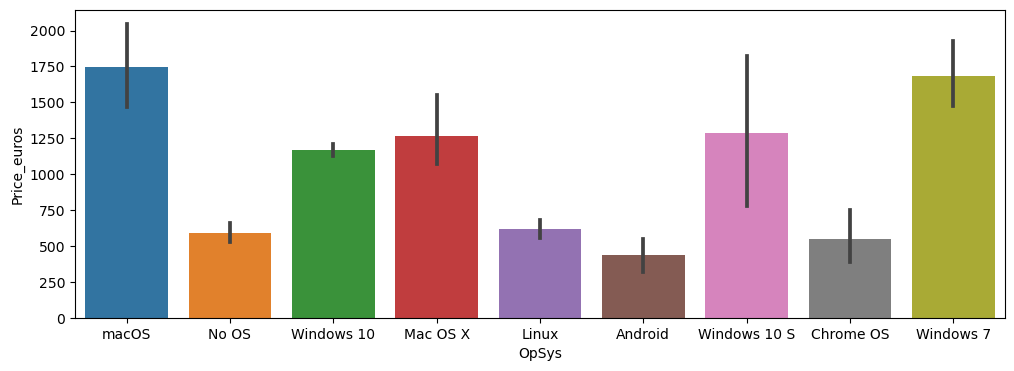

In [978]:
plt.figure(figsize=(12,4))
sns.barplot(df,x=df["OpSys"],y=df["Price_euros"])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD A9-Series 9420'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Intel Core M'),
  Text(5, 0, 'Others'),
  Text(6, 0, 'Intel Celeron Dual'),
  Text(7, 0, 'Intel Pentium Quad'),
  Text(8, 0, 'AMD A12-Series 9720P'),
  Text(9, 0, 'Intel Celeron Quad')])

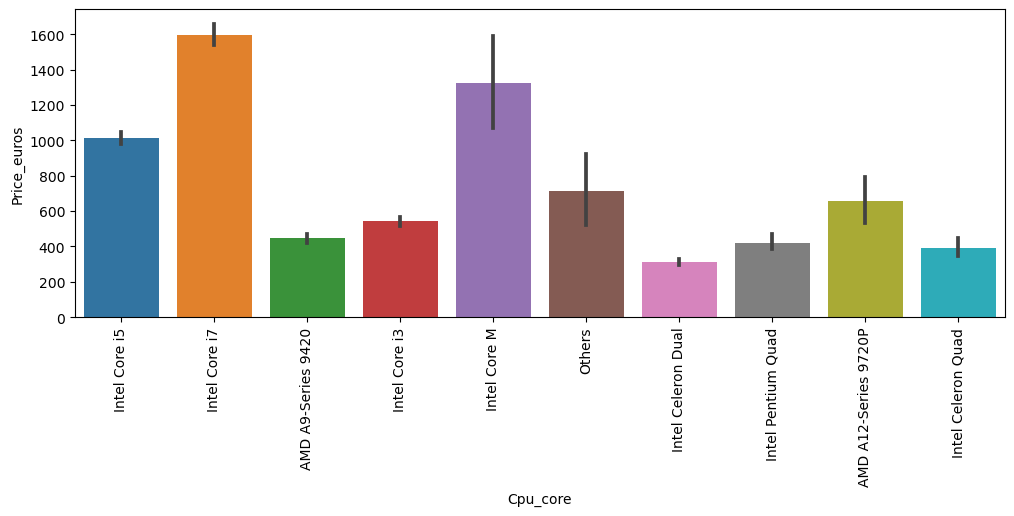

In [979]:
plt.figure(figsize=(12,4))
sns.barplot(df,x=df["Cpu_core"],y=df["Price_euros"])
plt.xticks(rotation="vertical")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '0.9'),
  Text(1, 0, '1.0'),
  Text(2, 0, '1.1'),
  Text(3, 0, '1.2'),
  Text(4, 0, '1.3'),
  Text(5, 0, '1.44'),
  Text(6, 0, '1.5'),
  Text(7, 0, '1.6'),
  Text(8, 0, '1.8'),
  Text(9, 0, '1.9'),
  Text(10, 0, '1.92'),
  Text(11, 0, '2.0'),
  Text(12, 0, '2.1'),
  Text(13, 0, '2.2'),
  Text(14, 0, '2.3'),
  Text(15, 0, '2.4'),
  Text(16, 0, '2.5'),
  Text(17, 0, '2.6'),
  Text(18, 0, '2.7'),
  Text(19, 0, '2.8'),
  Text(20, 0, '2.9'),
  Text(21, 0, '3.0'),
  Text(22, 0, '3.1'),
  Text(23, 0, '3.2'),
  Text(24, 0, '3.6')])

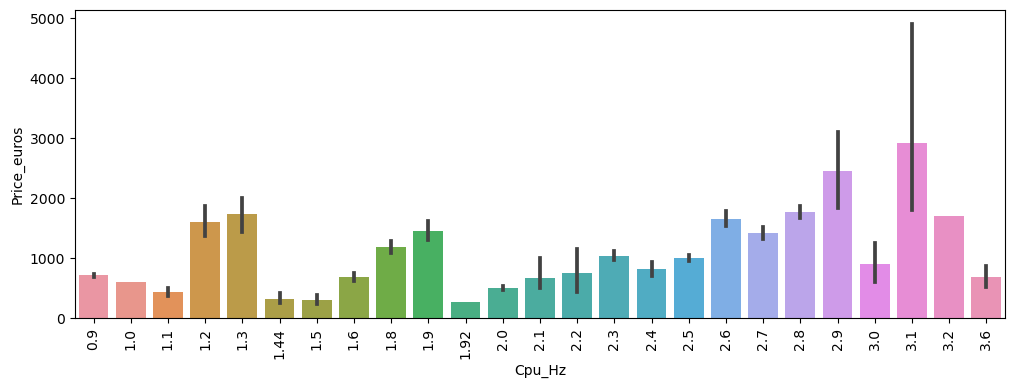

In [980]:
plt.figure(figsize=(12,4))
sns.barplot(df,x=df["Cpu_Hz"],y=df["Price_euros"])
plt.xticks(rotation="vertical")

In [981]:
df.corr()["Price_euros"]

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_57126/2230701413.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Price_euros"]


Inches                0.067329
Ram                   0.742905
Weight                0.209867
Price_euros           1.000000
Touchscreen           0.192917
IPS Panel             0.253320
X_res                 0.557369
Y_res                 0.554591
Cpu_Hz                0.430122
HDD                  -0.096891
SSD                   0.670660
Hybrid                0.007942
Flash_Storage        -0.040067
SSD Size              0.670660
HDD Size             -0.096891
Flash Storage Size   -0.040067
Hyrbid Size           0.007942
Name: Price_euros, dtype: float64

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_57126/603992124.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

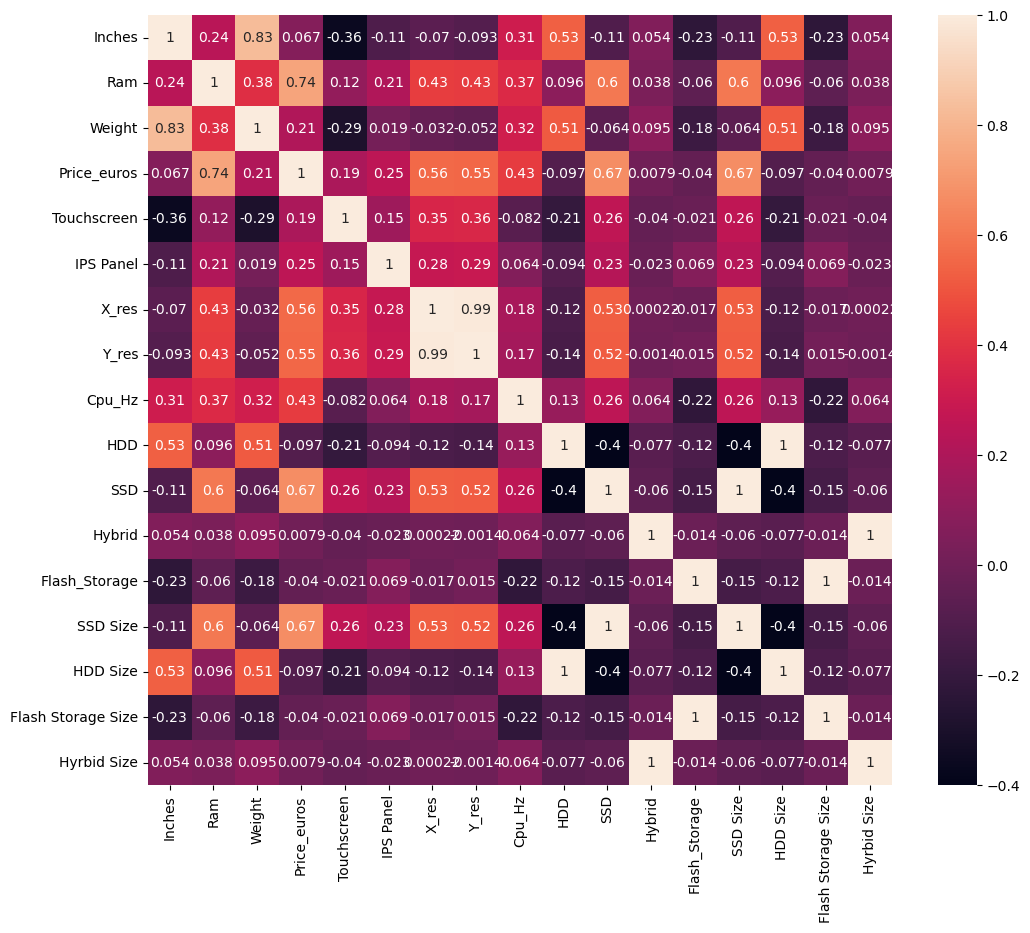

In [982]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [983]:
df.drop(columns=["Flash Storage Size","Hyrbid Size"],inplace = True)

In [984]:
df.sample(5)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS Panel,X_res,Y_res,Cpu_core,Cpu_Hz,HDD,SSD,Hybrid,Flash_Storage,SSD Size,HDD Size
710,Lenovo,Gaming,15.6,8,Nvidia,Windows 10,2.50,1249.00,0,1,1920,1080,Intel Core i7,2.8,1000,128,0,0,128,1000
987,Lenovo,Gaming,15.6,8,Nvidia,Windows 10,2.50,1189.00,0,1,1920,1080,Intel Core i7,2.8,1000,128,0,0,128,1000
841,Dell,Gaming,17.3,32,Nvidia,Windows 10,4.42,3072.89,0,1,1920,1080,Intel Core i7,2.8,1000,512,0,0,512,1000
231,HP,Notebook,15.6,4,AMD,Windows 10,2.10,330.00,0,0,1366,768,Others,1.5,500,0,0,0,0,500
661,Lenovo,Notebook,15.6,4,Intel,Windows 10,2.20,419.00,0,0,1366,768,Intel Celeron Dual,1.1,500,0,0,0,0,500


In [985]:
X = df.drop(columns="Price_euros")
y = np.log(df["Price_euros"])

In [986]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [987]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [988]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,r2_score

In [989]:
X_train.head(1)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Touchscreen,IPS Panel,X_res,Y_res,Cpu_core,Cpu_Hz,HDD,SSD,Hybrid,Flash_Storage,SSD Size,HDD Size
138,Lenovo,Notebook,15.6,4,Nvidia,No OS,2.2,0,0,1920,1080,Intel Core i5,2.5,1000,0,0,0,0,1000


In [990]:
step_1 = ColumnTransformer(transformers=[
    ("ohe_1",OneHotEncoder(sparse = False,drop = "first"),[0,1,4,5,11])
],remainder="passthrough")

step_2 = LinearRegression()

pipe_lr = Pipeline(
[
    ("OHE",step_1),
    ("LR",step_2)
    
])

pipe_lr.fit(X_train,y_train)

y_pred = pipe_lr.predict(X_test)

model_name = []
rmse_score = []
r2 = []

model_name.append("Linear Regression")
rmse_score.append(np.sqrt(mean_squared_error(y_test,y_pred)))
r2.append(r2_score(y_test,y_pred))

print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")   

RMSE: 0.25229555610954796
R2 Score: 0.833312773213865


/Users/sunny/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [991]:
step_1 = ColumnTransformer(transformers=[
    ("ohe_1",OneHotEncoder(sparse = False,drop = "first"),[0,1,4,5,11])
],remainder="passthrough")

step_2 = Ridge(alpha=5)

pipe_ridge = Pipeline(
[
    ("OHE",step_1),
    ("Ridge",step_2)
    
])

pipe_ridge.fit(X_train,y_train)

y_pred = pipe_ridge.predict(X_test)



model_name.append("Ridge")
rmse_score.append(np.sqrt(mean_squared_error(y_test,y_pred)))
r2.append(r2_score(y_test,y_pred))

print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")   

RMSE: 0.25355736720899785
R2 Score: 0.831641291127017


/Users/sunny/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [992]:
from sklearn.neighbors import KNeighborsRegressor

In [993]:
step_1 = ColumnTransformer(transformers=[
    ("ohe_1",OneHotEncoder(sparse = False,drop = "first"),[0,1,4,5,11])
],remainder="passthrough")

step_2 = KNeighborsRegressor(n_neighbors=3)

pipe_knn = Pipeline(
[
    ("OHE",step_1),
    ("KNN",step_2)
    
])

pipe_knn.fit(X_train,y_train)

y_pred = pipe_knn.predict(X_test)


model_name.append("KNN")
rmse_score.append(np.sqrt(mean_squared_error(y_test,y_pred)))
r2.append(r2_score(y_test,y_pred))

print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")   

RMSE: 0.27846902640201515
R2 Score: 0.7969341412644968


/Users/sunny/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [994]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [995]:

step_1 = ColumnTransformer(transformers=[
    ("ohe_1",OneHotEncoder(sparse = False,drop = "first"),[0,1,4,5,11])
],remainder="passthrough")

step_2 = RandomForestRegressor(n_estimators=100,random_state=12)


pipe_rf = Pipeline(
[
    ("OHE",step_1),
    ("RF",step_2),
    
])

pipe_rf.fit(X_train,y_train)

y_pred = pipe_rf.predict(X_test)



model_name.append("RF")
rmse_score.append(np.sqrt(mean_squared_error(y_test,y_pred)))
r2.append(r2_score(y_test,y_pred))

print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")   

/Users/sunny/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RMSE: 0.22605104065053644
R2 Score: 0.8661876676290072


In [996]:

step_1 = ColumnTransformer(transformers=[
    ("ohe_1",OneHotEncoder(sparse = False,drop = "first"),[0,1,4,5,11])
],remainder="passthrough")

step_2 = GradientBoostingRegressor(n_estimators=300,random_state=12)


pipe_gb = Pipeline(
[
    ("OHE",step_1),
    ("GB",step_2),
    
])

pipe_gb.fit(X_train,y_train)

y_pred = pipe_gb.predict(X_test)



model_name.append("GB")
rmse_score.append(np.sqrt(mean_squared_error(y_test,y_pred)))
r2.append(r2_score(y_test,y_pred))

print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")   

/Users/sunny/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RMSE: 0.20342823137339358
R2 Score: 0.8916308752391733


In [997]:
from xgboost import XGBRegressor

In [998]:

step_1 = ColumnTransformer(transformers=[
    ("ohe_1",OneHotEncoder(sparse = False,drop = "first"),[0,1,4,5,11])
],remainder="passthrough")

step_2 = XGBRegressor(n_estimators=500,max_depth=5,learning_rate=0.1)


pipe_xgb = Pipeline(
[
    ("OHE",step_1),
    ("XGB",step_2),
    
])

pipe_xgb.fit(X_train,y_train)

y_pred = pipe_xgb.predict(X_test)


model_name.append("XGB")
rmse_score.append(np.sqrt(mean_squared_error(y_test,y_pred)))
r2.append(r2_score(y_test,y_pred))

print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")   

RMSE: 0.21059770999389585
R2 Score: 0.8838577037960177


/Users/sunny/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [999]:
eval_data = {
    "Model":model_name,"RMSE":rmse_score,"R2":r2
}

In [1000]:
model_scores = pd.DataFrame(eval_data)

In [1001]:
model_scores

,Model,RMSE,R2
0,Linear Regression,0.252296,0.833313
1,Ridge,0.253557,0.831641
2,KNN,0.278469,0.796934
3,RF,0.226051,0.866188
4,GB,0.203428,0.891631
5,XGB,0.210598,0.883858


In [1002]:
import pickle

pickle.dump(df,open('LaptopPrediction.pkl','wb'))
pickle.dump(pipe_gb,open('Laptop_Predictor_GB.pkl','wb'))